## NBA All-Star or Average Player

This project was orginially based for an advanced level statistics course at the University of Illinois Urbana-Champaign. STAT 207: Data Science Exploration offers a thorough exploration of statistical concepts and Python programming, integrating practical tools like Jupyter notebooks and GitHub. Students engage with the data science pipeline from formulating research questions to performing complex data analysis, including managing and analyzing data, regression modeling, and machine learning. The curriculum emphasizes probability models, statistical inference, predictive and prescriptive analytics, and version control, equipping students to make informed decisions and handle real-world data science challenges. Additionally, the course develops proficiency in Python coding, enabling students to manage data, build models, and apply statistical methods effectively.

The link to the project is here for reference:
https://github.com/justinstarks3/Starks-s-Projects-/tree/main/STAT%20207%20Final%20Project

Those who contributed were Shray Srivastavva, Albert Chen, Josh Fajardo, and myself!

In this specific notebook, I will try to improve this model by also seeing if we can apply it to other seasons with solid accuracy!

In our conclusion we mentioned something similar to the following our recommended model for predicting NBA All-Stars has demonstrated robust performance with an average cross-validated AUC of 0.993, making it highly suitable for sports analysts and bettors. However, there's no absolute certainty that this is the best possible model without testing all conceivable models and hyperparameters, a task that is impractical. Alternatives could include experimenting with different classification models and employing feature selection techniques to possibly enhance the AUC. The analysis faces limitations due to a lack of diverse statistical categories and the inability to incorporate intangible factors like leadership and flashiness, with potentially useful omitted advanced statistics!

## Datasets used in the STAT 207 Final 

In [2]:
import pandas as pd

/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
per_game_stats = pd.read_csv('NBA_PG_Stats_1.csv')
per_game_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,achiupr01
2,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,...,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,achiupr01
3,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
4,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01


In [4]:
per_game_stats.shape[0]

735

In [5]:
advanced_stats = pd.read_csv('NBA_PG_ADV_1.csv')
advanced_stats.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,Unnamed: 23,OBPM,DBPM,BPM,VORP,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,0.239,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,Precious Achiuwa,C,24,TOR,25,437,15.0,0.512,0.276,0.247,...,0.0,0.4,0.4,0.048,NaN,-1.4,-0.2,-1.6,0.0,achiupr01
2,Precious Achiuwa,PF,24,NYK,49,1187,14.5,0.564,0.167,0.234,...,1.2,1.8,3.0,0.122,NaN,-1.9,0.5,-1.4,0.2,achiupr01
3,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,0.381,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
4,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,0.129,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01


In [6]:
advanced_stats.shape[0]

735

In both datasets, some players have been traded, leading to duplicates in the data. Basketball-Reference addresses this effectively by including a 'Tot' observation for such players. This 'Tot', or Total, represents the cumulative statistics for the player across all teams they have played for during the season.

## Dataset Discussion 

These datasets are great, but there are some shortcomings to them. For example, we only used a year of NBA per game and advanced statistics. However, it would be a very tedious process to go back and collect years and years of NBA data dating back to make this model as accurate as possible. As a result, we are going to change the dataset we're using. 

The new ataset is comprised by Robert Sunderhaft scraping four types of stats: the regular season stats, the advanced season stats, the team's stats, and the MVP voting stats. He joined and cleaned this data on a seperate python script. The code for the web scrapers will be posted on his github.The data set I am using is also posted on Kaggle.



## Data Source 

The dataset was sourced from Kaggle and it can be accessed using the following think: https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share the dataset was downloaded on 8/6/2024.

## Dataset display

In [7]:
df = pd.read_csv('NBA_Dataset.csv')
df.fillna(0)


,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


Okay this dataset is great, but let's update it until the 2023-2024 NBA season!

In [8]:
NBA_2223_Stats = pd.read_csv('NBA_2223_Stats.csv')
NBA_2223_Stats

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
0,2023,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,2023,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,2023,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,2023,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,2023,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,2023,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
675,2023,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
676,2023,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
677,2023,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [9]:
NBA_2324_Stats = pd.read_csv('NBA_2324_Stats.csv')
NBA_2324_Stats

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
0,2024,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,13.8,15.9,1.2,2.2,3.4,0.102,-1.7,0.3,-1.4,0.2
1,2024,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,13.3,21.2,0.0,0.4,0.4,0.048,-1.4,-0.2,-1.6,0.0
2,2024,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,14.1,14.0,1.2,1.8,3.0,0.122,-1.9,0.5,-1.4,0.2
3,2024,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,12.0,24.9,2.9,4.3,7.2,0.144,0.8,1.7,2.4,2.7
4,2024,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,12.3,13.4,-0.5,0.6,0.1,0.002,-3.5,-0.9,-4.4,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,2024,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,15.2,12.8,0.1,0.1,0.3,0.137,-1.5,0.6,-0.9,0.0
731,2024,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,16.5,30.5,4.0,0.6,4.6,0.114,4.9,-2.3,2.6,2.2
732,2024,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,15.9,17.9,0.3,0.4,0.7,0.062,-1.6,-1.5,-3.0,-0.1
733,2024,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,16.9,12.9,0.4,0.4,0.8,0.124,-2.9,0.3,-2.6,0.0


Okay now let's merge these dataframes!

In [10]:
common_columns = set(df.columns) & set(NBA_2223_Stats.columns) & set(NBA_2324_Stats.columns)


In [11]:
nba_dataset_common = df[list(common_columns)]
nba_2223_stats_common = NBA_2223_Stats[list(common_columns)]
nba_2324_stats_common = NBA_2324_Stats[list(common_columns)]


merged_nba_data = pd.concat([nba_dataset_common, nba_2223_stats_common, nba_2324_stats_common], ignore_index=True)

## Adding is an All-Star Column

In [12]:
all_stars_df = pd.read_csv('All_Stars.csv')
all_stars_df[['Year','Player']]

,Year,Player
0,2024,Bam Adebayo
1,2024,Giannis Antetokounmpo
2,2024,Paolo Banchero
3,2024,Scottie Barnes
4,2024,Jaylen Brown
...,...,...
1076,1982,Micheal Ray Richardson
1077,1982,Dan Roundfield (1)
1078,1982,Isiah Thomas*
1079,1982,Kelly Tripucka


In [13]:
all_stars_df.rename(columns={'Year': 'season', 'Player':'player'}, inplace=True)

In [14]:
all_stars_df['player'] = all_stars_df['player'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip()
final_merged_nba_data = pd.merge(merged_nba_data, all_stars_df, on=['player', 'season'], how='left', indicator=True)
final_merged_nba_data['Is_All_Star'] = final_merged_nba_data['_merge'] == 'both'
final_merged_nba_data.drop(columns=['_merge'], inplace=True)
final_merged_nba_data


,fta_per_g,efg_pct,pf_per_g,ts_pct,ast_per_g,fg2_per_g,g,tov_pct,ft_pct,stl_pct,...,ast_pct,blk_pct,per,fta_per_fga_pct,orb_pct,player,season,Unnamed: 2,Unnamed: 3,Is_All_Star
0,5.8,0.579,2.9,0.608,3.0,9.9,76,13.3,0.706,1.1,...,11.9,4.1,23.4,0.340,7.3,Kareem Abdul-Jabbar,1982,NaN,NaN,False
1,2.9,0.494,3.4,0.529,4.5,6.4,79,14.8,0.781,2.3,...,22.1,1.9,18.6,0.227,6.6,Alvan Adams,1982,NaN,NaN,False
2,4.8,0.480,3.0,0.514,3.2,7.0,51,12.7,0.680,1.2,...,18.6,0.9,17.3,0.301,6.7,Mark Aguirre,1982,NaN,NaN,False
3,1.2,0.369,1.6,0.439,1.6,1.4,53,17.5,0.862,3.1,...,19.7,0.3,10.1,0.294,5.0,Danny Ainge,1982,NaN,NaN,False
4,4.6,0.477,1.9,0.542,8.0,4.4,68,18.4,0.747,1.1,...,31.9,0.1,14.3,0.485,1.3,Tiny Archibald,1982,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,0.3,0.524,1.1,0.515,0.7,1.1,10,15.2,0.333,2.7,...,10.4,2.0,15.1,0.143,22.8,Thaddeus Young,2024,NaN,NaN,False
19118,7.5,0.516,2.0,0.585,10.8,4.8,54,16.5,0.855,1.8,...,45.1,0.5,20.3,0.404,1.2,Trae Young,2024,NaN,NaN,True
19119,0.6,0.552,1.1,0.565,0.6,2.0,48,15.9,0.679,0.7,...,7.7,2.9,15.0,0.152,14.7,Omer Yurtseven,2024,NaN,NaN,False
19120,0.9,0.427,1.0,0.483,0.9,0.6,43,16.9,0.605,1.4,...,15.2,1.5,12.8,0.613,16.9,Cody Zeller,2024,NaN,NaN,False


In [15]:
final_df =final_merged_nba_data[['season', 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'player', 'orb_pct', 'ows',
       'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct', 'fg3_pct',
       'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g', 'trb_pct', 'bpm',
       'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct', 'blk_pct', 'tov_per_g',
       'dbpm', 'vorp', 'mp', 'fta_per_fga_pct', 'tov_pct',
       'trb_per_g', 'team_id', 'mp_per_g', 'fg_pct', 'ws', 'blk_per_g',
       'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'pos', 'fg2_pct', 'fg_per_g',
       'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age', 'Is_All_Star']]

In [16]:
final_df.drop_duplicates()

,season,ft_pct,obpm,fg3a_per_fga_pct,player,orb_pct,ows,ws_per_48,efg_pct,stl_per_g,...,fg2_pct,fg_per_g,g,dws,ast_per_g,ast_pct,per,stl_pct,age,Is_All_Star
0,1982,0.706,3.8,0.002,Kareem Abdul-Jabbar,7.3,6.9,0.192,0.579,0.8,...,0.580,9.9,76,3.9,3.0,11.9,23.4,1.1,34,False
1,1982,0.781,1.4,0.001,Alvan Adams,6.6,2.5,0.144,0.494,1.4,...,0.494,6.4,79,4.7,4.5,22.1,18.6,2.3,27,False
2,1982,0.680,2.3,0.087,Mark Aguirre,6.7,1.0,0.061,0.480,0.7,...,0.475,7.5,51,0.8,3.2,18.6,17.3,1.2,22,False
3,1982,0.862,-3.7,0.077,Danny Ainge,5.0,-0.3,0.042,0.369,0.7,...,0.363,1.5,53,0.8,1.6,19.7,10.1,3.1,22,False
4,1982,0.747,1.4,0.025,Tiny Archibald,1.3,3.4,0.115,0.477,0.8,...,0.475,4.5,68,1.8,8.0,31.9,14.3,1.1,33,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,2024,0.333,-1.5,0.048,Thaddeus Young,22.8,0.1,0.137,0.524,0.5,...,0.550,1.1,10,0.1,0.7,10.4,15.1,2.7,35,False
19118,2024,0.855,4.9,0.465,Trae Young,1.2,4.0,0.114,0.516,1.3,...,0.479,8.0,54,0.6,10.8,45.1,20.3,1.8,25,True
19119,2024,0.679,-1.6,0.130,Omer Yurtseven,14.7,0.3,0.062,0.552,0.2,...,0.588,2.1,48,0.4,0.6,7.7,15.0,0.7,25,False
19120,2024,0.605,-2.9,0.048,Cody Zeller,16.9,0.4,0.124,0.427,0.2,...,0.424,0.6,43,0.4,0.9,15.2,12.8,1.4,31,False


In [17]:
final_df = final_df[['season', 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'player', 'orb_pct',
       'ows', 'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct',
       'fg3_pct', 'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g',
       'trb_pct', 'bpm', 'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct',
       'blk_pct', 'tov_per_g', 'dbpm', 'vorp', 'mp', 'fta_per_fga_pct',
       'tov_pct', 'trb_per_g', 'team_id', 'mp_per_g', 'fg_pct', 'ws',
       'blk_per_g', 'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'pos', 'fg2_pct',
       'fg_per_g', 'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age',
       'Is_All_Star']]

## Outlier Cleaning

When analyzing NBA statistics, it's crucial to carefully examine outliers, as they can provide valuable insights into player performance and team strategies. Metrics like points per game and rebounds, along with more intricate statistics such as Win Shares (WS), often show significant variation. These outliers may highlight exceptional events, such as unusually high scores, which could reflect substantial shifts in player skills or changes in team tactics, rather than being merely anomalies or errors in data gathering. To accurately assess whether these data points are errors or genuine instances of extraordinary performance, it's essential to review game footage, player histories, and other contextual factors. Given the depth of NBA analytics, hastily discarding these outliers might distort the true extent of a player's capabilities or a team's strategic effectiveness, potentially leading to misjudgments about typical performance levels. Therefore, we have chosen to retain all outliers in our datasets, as they authentically represent real NBA player per game and advanced statistics.


## Checking for Multicolinearity 

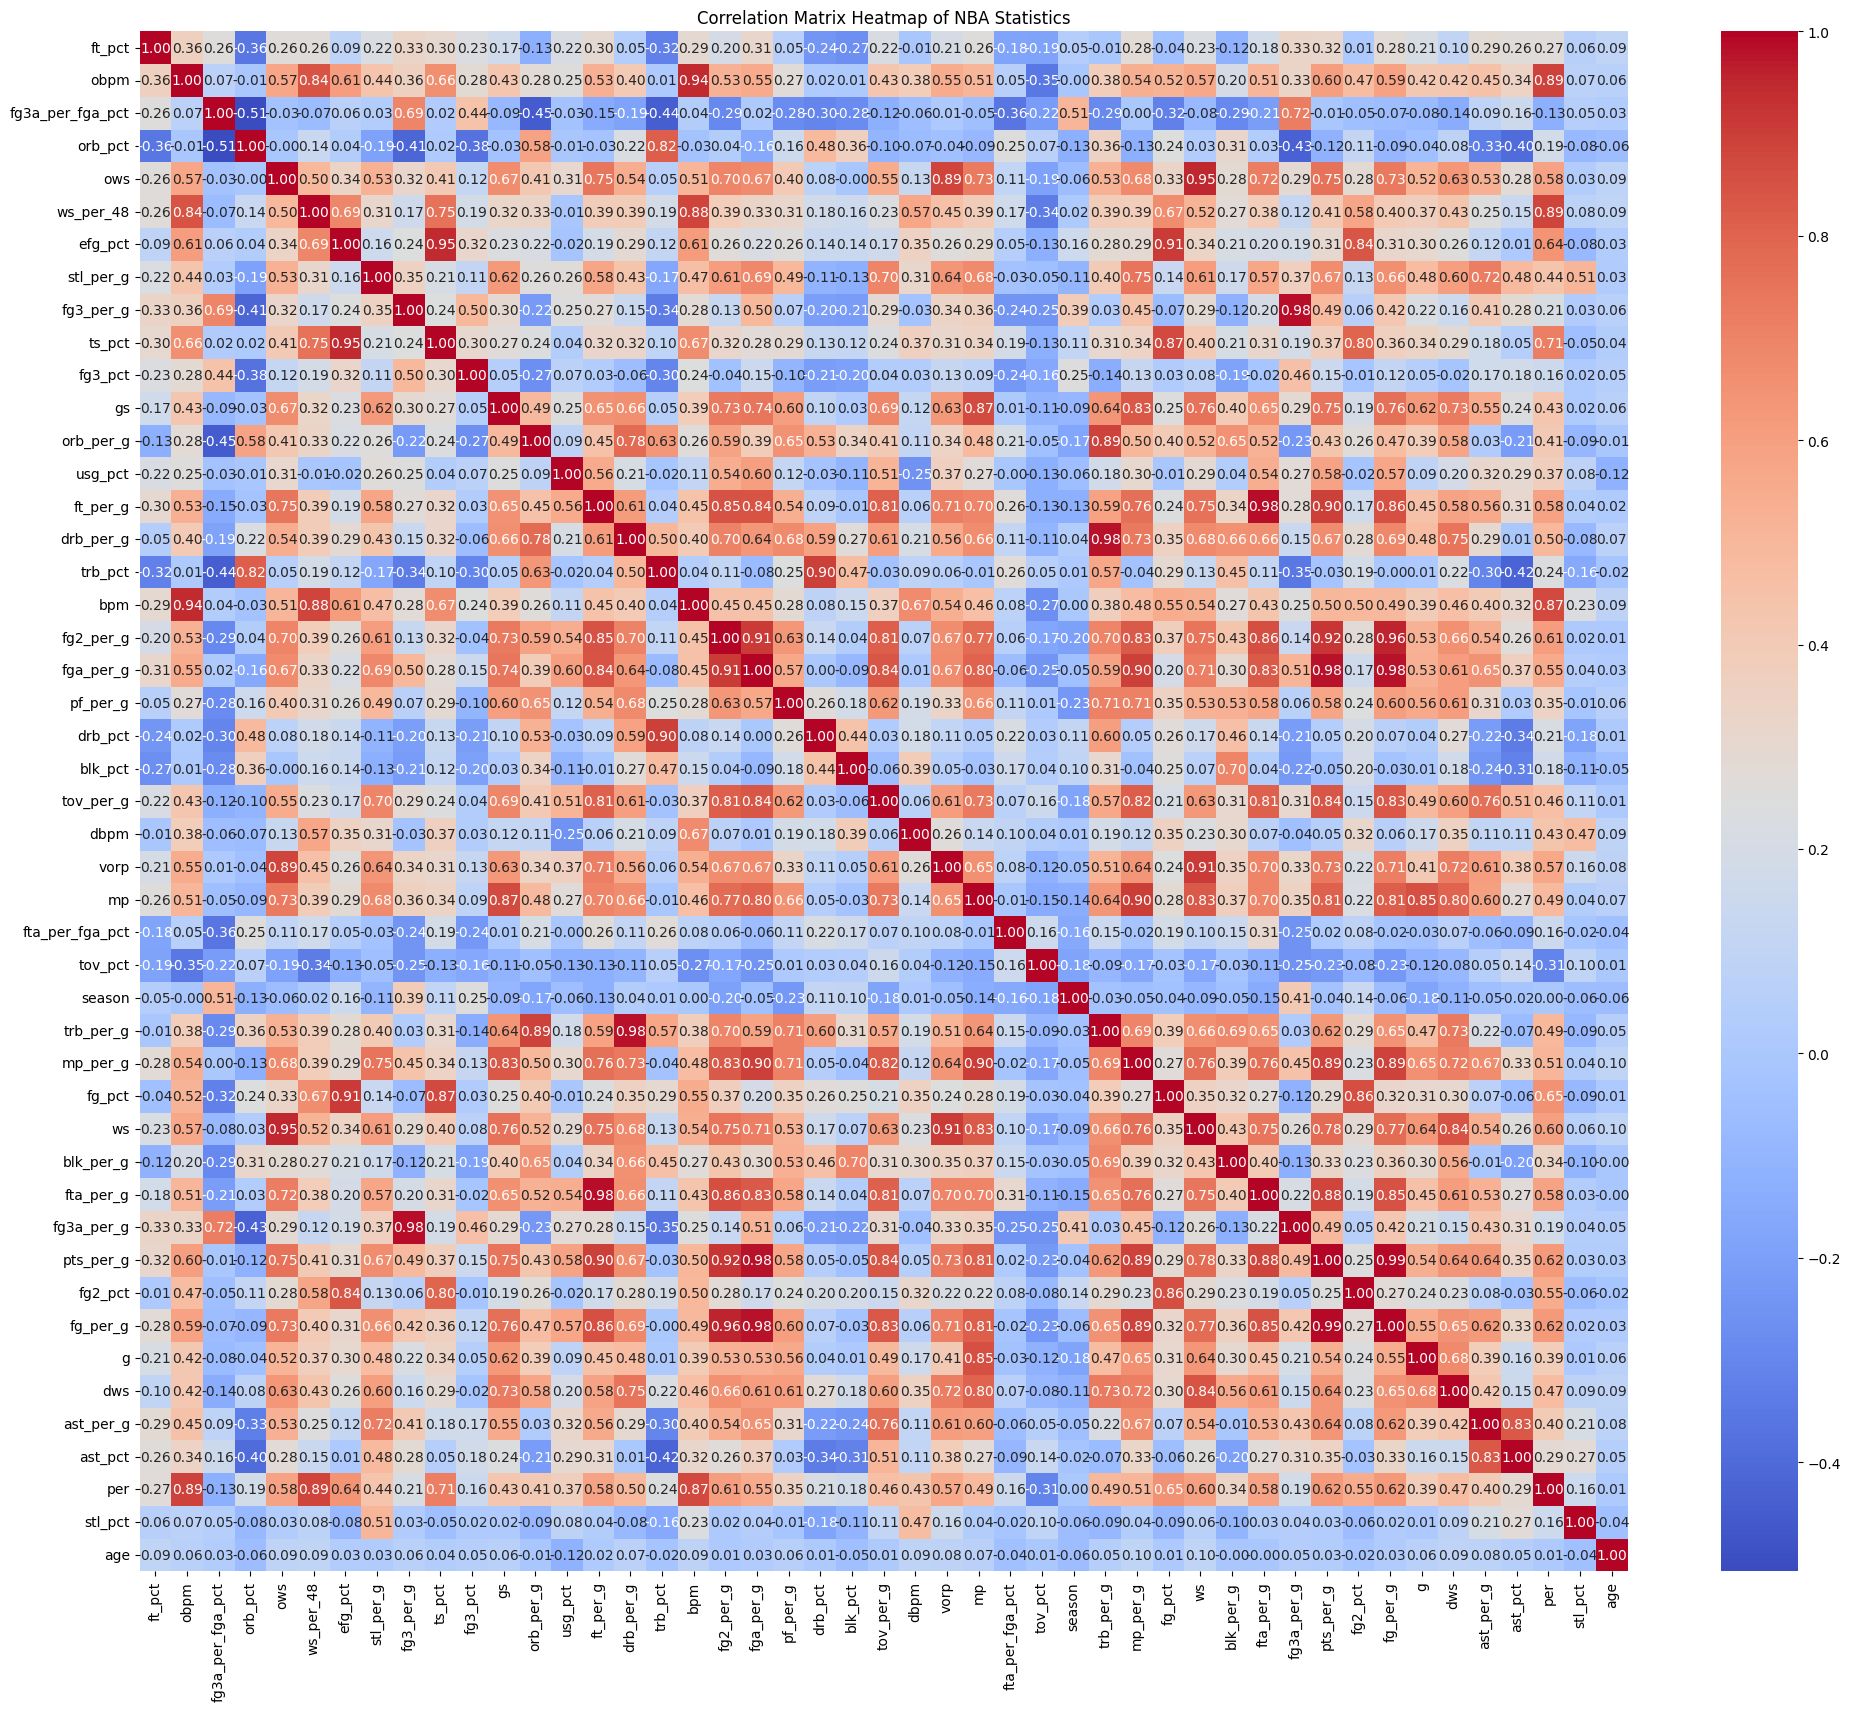

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['ft_pct', 'obpm', 'fg3a_per_fga_pct', 'orb_pct', 'ows',
                   'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct', 'fg3_pct',
                   'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g', 'trb_pct', 'bpm',
                   'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct', 'blk_pct', 'tov_per_g',
                   'dbpm', 'vorp', 'mp', 'fta_per_fga_pct', 'tov_pct', 'season',
                   'trb_per_g', 'mp_per_g', 'fg_pct', 'ws', 'blk_per_g',
                   'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'fg2_pct', 'fg_per_g',
                   'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age']

correlation_matrix = final_df[numeric_columns].corr()

plt.figure(figsize=(24, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of NBA Statistics')
plt.show()


In analyzing NBA data, it is important to retain variables despite the presence of multicollinearity for a thorough analysis and informed decision-making. Multicollinearity may complicate the interpretation of individual predictors but does not diminish the overall predictive accuracy of the model. Keeping all pertinent variables offers a complete perspective on player performances, encapsulating different aspects that reveal unique qualities such as offensive efficiency and broader impact. Advanced metrics derived from these variables are critical for detailed evaluations and strategic decisions in basketball analytics. Modern statistical methods like PCA (Principal Component Analysis) and regularization techniques effectively address multicollinearity, ensuring that the data's depth and complexity are preserved, facilitating well-rounded decision-making without reducing the game's complex dynamics.

## Dealing with Imbalanced Data

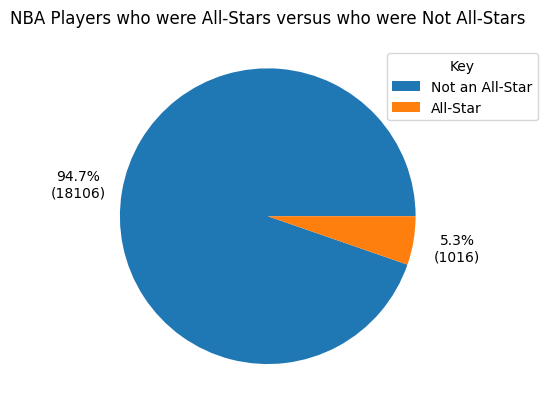

In [19]:
import numpy as np
classes = final_df["Is_All_Star"]
infoDf = df[["player", "pos", "team_id"]]
dataDf = df.drop(["player", "pos", "team_id"], axis = 1)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who were All-Stars versus who were Not All-Stars")
ax.legend(["Not an All-Star", "All-Star"],
          title="Key",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

Random undersampling is a frequently used technique to balance datasets by randomly removing a portion of data from the majority class. Although effective, this method risks discarding players with valuable statistics and keeping those with less relevant data. A more focused approach would be to selectively remove players who are less likely to be considered for All-Star games, such as those with low scoring, few game starts, or limited playing time. 

In [20]:
allstar = final_df[final_df["Is_All_Star"] == True]
nonallstar = final_df[final_df["Is_All_Star"] == False]


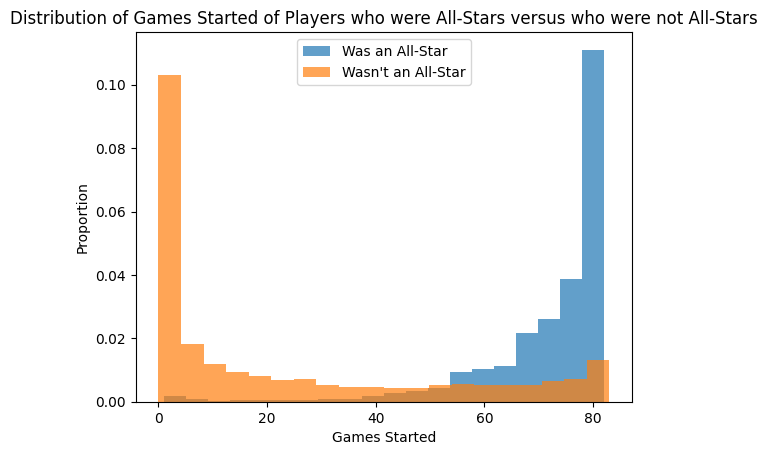

In [21]:
import matplotlib.pyplot as plt

plt.hist(allstar['gs'].dropna(), bins=20, alpha=0.7, density=True, label="Was an All-Star")
plt.hist(nonallstar['gs'].dropna(), bins=20, alpha=0.7, density=True, label="Wasn't an All-Star")

plt.ylabel("Proportion")
plt.xlabel("Games Started")
plt.title("Distribution of Games Started of Players who were All-Stars versus who were not All-Stars")
plt.legend()
plt.show()


In [22]:
allstar[allstar["gs"] < 20][["season", "player", "g", "gs", "pts_per_g", 'Is_All_Star']].reset_index(drop = True)

,season,player,g,gs,pts_per_g,Is_All_Star
0,1986,Michael Jordan,18,7,22.7,True
1,1991,Kevin McHale,68,10,18.4,True
2,1991,Ricky Pierce,78,2,20.5,True
3,1992,Dan Majerle,82,15,17.3,True
4,1997,Chris Gatling,47,1,19.0,True
5,1998,Kobe Bryant,79,1,15.4,True
6,1998,Anfernee Hardaway,19,15,16.4,True
7,2001,Grant Hill,4,4,13.8,True
8,2001,Alonzo Mourning,13,3,13.6,True
9,2011,Yao Ming,5,5,10.2,True


Before narrowing down the dataset, it's interesting to note some outliers concerning players who started fewer than 20 games yet were still selected as All-Stars. Various instances stand out where NBA Legends such as Kobe Bryant, Dwayne Wade, Kevin Durant, and Michael Jordan are starting less than 20 games and still making the All-Star roster. This highlights the subjective nature of All-Star voting indicating that while player statistics are crucial, the overall sentiment and perception also significantly influence the outcomes. Despite these outliers, analyzing broader voting patterns allows for the identification of predictable trends in the All-Star process.

In [23]:
final_df = final_df[final_df['gs']> 20]
final_df

,season,ft_pct,obpm,fg3a_per_fga_pct,player,orb_pct,ows,ws_per_48,efg_pct,stl_per_g,...,fg2_pct,fg_per_g,g,dws,ast_per_g,ast_pct,per,stl_pct,age,Is_All_Star
0,1982,0.706,3.8,0.002,Kareem Abdul-Jabbar,7.3,6.9,0.192,0.579,0.8,...,0.580,9.9,76,3.9,3.0,11.9,23.4,1.1,34,False
1,1982,0.781,1.4,0.001,Alvan Adams,6.6,2.5,0.144,0.494,1.4,...,0.494,6.4,79,4.7,4.5,22.1,18.6,2.3,27,False
4,1982,0.747,1.4,0.025,Tiny Archibald,1.3,3.4,0.115,0.477,0.8,...,0.475,4.5,68,1.8,8.0,31.9,14.3,1.1,33,True
8,1982,0.830,1.5,0.017,Greg Ballard,5.1,4.1,0.154,0.479,1.7,...,0.476,7.9,79,5.3,3.2,13.1,17.9,2.2,27,False
10,1982,0.629,-2.0,0.008,Mike Bantom,9.7,0.2,0.069,0.471,0.8,...,0.470,4.1,82,2.7,1.4,8.1,12.7,1.5,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,2024,0.788,-2.1,0.412,Patrick Williams,4.3,0.1,0.048,0.525,0.9,...,0.474,3.7,43,1.0,1.5,7.7,11.0,1.7,22,False
19100,2024,0.800,-1.7,0.551,Vince Williams Jr.,4.3,1.1,0.093,0.550,0.9,...,0.529,3.3,52,1.7,3.4,18.0,12.8,1.6,23,False
19102,2024,0.702,3.3,0.016,Zion Williamson,6.2,4.7,0.164,0.573,1.1,...,0.574,8.9,70,2.8,5.0,26.5,22.8,1.7,23,False
19118,2024,0.855,4.9,0.465,Trae Young,1.2,4.0,0.114,0.516,1.3,...,0.479,8.0,54,0.6,10.8,45.1,20.3,1.8,25,True


To be considered an All-Star significant on-court playing time is essential. Based on this principle, we can strategically exclude players with minimal playing time from our dataset, effectively undersampling the majority class and minimizing extraneous data. For determining a cutoff point, I'll calculate the third standard deviation below the average minutes played per game by players who were All-Stars. 

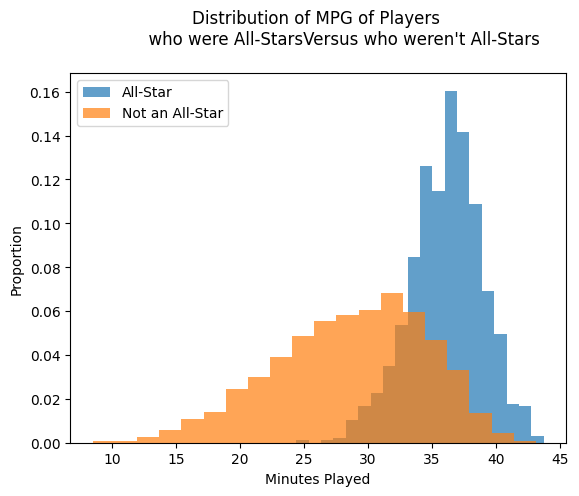

The cutoff is 27.666 minutes per game


In [24]:
allstar = final_df[final_df["Is_All_Star"] == True]
nonallstar = final_df[final_df["Is_All_Star"] == False]

plt.hist(allstar["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "All-Star")
plt.hist(nonallstar["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "Not an All-Star")
plt.ylabel("Proportion")
plt.xlabel("Minutes Played")
plt.title("""Distribution of MPG of Players 
          who were All-StarsVersus who weren't All-Stars
          """)
plt.legend()
plt.show()

mp_perg_cutoff = allstar["mp_per_g"].mean() - 3*allstar["mp_per_g"].std()
print(f"The cutoff is {mp_perg_cutoff:.3f} minutes per game")

In [25]:
allstar[allstar["mp_per_g"] < mp_perg_cutoff][["season", "player", "mp_per_g", "pts_per_g"]].reset_index(drop = True)

,season,player,mp_per_g,pts_per_g
0,1982,Bob Lanier,26.8,13.5
1,1988,Steve Johnson,24.4,15.4


Two players here are removed from the dataset because they don't reach the minutes per game threshold

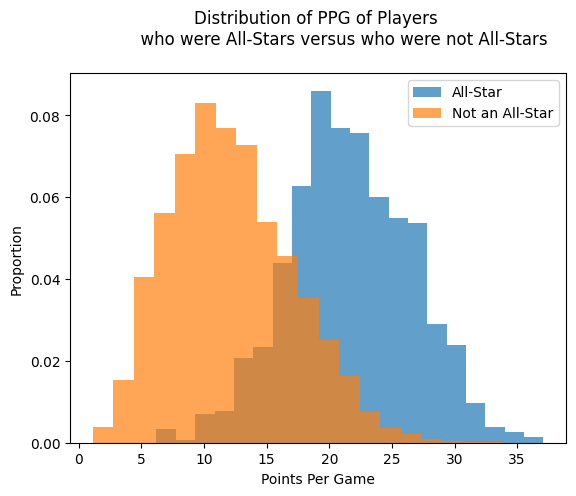

The cutoff is 6.872 points in a game


In [26]:
plt.hist(allstar["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "All-Star")
plt.hist(nonallstar["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "Not an All-Star")
plt.xlabel("Points Per Game")
plt.ylabel("Proportion")
plt.title("""Distribution of PPG of Players 
          who were All-Stars versus who were not All-Stars
          """)
plt.legend()
plt.show()

pts_cutoff = allstar["pts_per_g"].mean() - 3 * allstar["pts_per_g"].std()
print(f"The cutoff is {pts_cutoff:.3f} points in a game")

In [27]:
allstar[allstar["pts_per_g"] < pts_cutoff][["season", "player", "pts_per_g", 'blk_per_g', 'orb_per_g', 'drb_per_g']].reset_index(drop = True)

,season,player,pts_per_g,blk_per_g,orb_per_g,drb_per_g
0,1989,Mark Eaton,6.2,3.8,2.8,7.5


In [28]:
final_df = final_df[(final_df["pts_per_g"] > pts_cutoff) & (final_df["mp_per_g"] > mp_perg_cutoff)].reset_index(drop = True)
final_df

,season,ft_pct,obpm,fg3a_per_fga_pct,player,orb_pct,ows,ws_per_48,efg_pct,stl_per_g,...,fg2_pct,fg_per_g,g,dws,ast_per_g,ast_pct,per,stl_pct,age,Is_All_Star
0,1982,0.706,3.8,0.002,Kareem Abdul-Jabbar,7.3,6.9,0.192,0.579,0.8,...,0.580,9.9,76,3.9,3.0,11.9,23.4,1.1,34,False
1,1982,0.781,1.4,0.001,Alvan Adams,6.6,2.5,0.144,0.494,1.4,...,0.494,6.4,79,4.7,4.5,22.1,18.6,2.3,27,False
2,1982,0.747,1.4,0.025,Tiny Archibald,1.3,3.4,0.115,0.477,0.8,...,0.475,4.5,68,1.8,8.0,31.9,14.3,1.1,33,True
3,1982,0.830,1.5,0.017,Greg Ballard,5.1,4.1,0.154,0.479,1.7,...,0.476,7.9,79,5.3,3.2,13.1,17.9,2.2,27,False
4,1982,0.804,0.0,0.014,Kent Benson,9.4,2.2,0.101,0.507,0.9,...,0.508,5.4,75,3.0,2.1,8.8,14.4,1.2,27,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2024,0.901,2.4,0.590,Derrick White,2.4,5.2,0.171,0.578,1.0,...,0.555,5.3,73,3.3,5.2,21.2,16.9,1.5,29,False
4975,2024,0.757,-1.9,0.555,Grant Williams,4.4,1.3,0.059,0.560,0.6,...,0.558,3.6,76,1.3,2.3,11.3,10.6,1.0,25,False
4976,2024,0.814,2.0,0.243,Jalen Williams,1.9,4.5,0.157,0.592,1.1,...,0.576,7.5,71,2.7,4.5,21.3,19.1,1.7,22,False
4977,2024,0.702,3.3,0.016,Zion Williamson,6.2,4.7,0.164,0.573,1.1,...,0.574,8.9,70,2.8,5.0,26.5,22.8,1.7,23,False


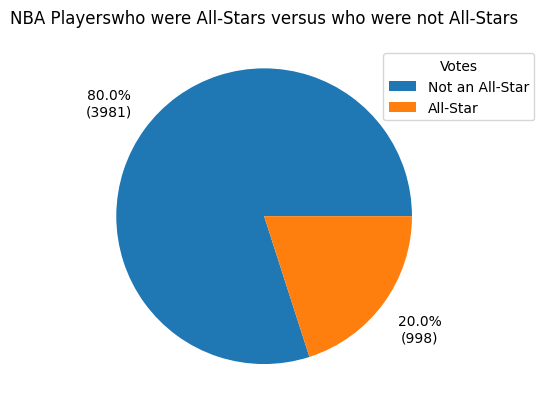

In [29]:
classes = final_df["Is_All_Star"]
dataDf = final_df.drop(["player", "pos", "team_id"], axis = 1)
unSmoteLen = len(dataDf)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Playerswho were All-Stars versus who were not All-Stars")

ax.legend(["Not an All-Star", "All-Star"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [30]:
dataDf.isnull().sum()

season                0
ft_pct                0
obpm                  0
fg3a_per_fga_pct    133
orb_pct               0
ows                   0
ws_per_48             0
efg_pct               0
stl_per_g             0
fg3_per_g             0
ts_pct                0
fg3_pct             199
gs                    0
orb_per_g             0
usg_pct               0
ft_per_g              0
drb_per_g             0
trb_pct               0
bpm                   0
fg2_per_g             0
fga_per_g             0
pf_per_g              0
drb_pct               0
blk_pct               0
tov_per_g             0
dbpm                  0
vorp                  0
mp                    0
fta_per_fga_pct     133
tov_pct               0
trb_per_g             0
mp_per_g              0
fg_pct                0
ws                    0
blk_per_g             0
fta_per_g             0
fg3a_per_g            0
pts_per_g             0
fg2_pct               0
fg_per_g              0
g                     0
dws             

In [31]:
columns_to_fill = ['fg3_pct', 'fg3a_per_fga_pct']  
dataDf[columns_to_fill] = dataDf[columns_to_fill].fillna(0)


In [32]:
dataDf.isnull().sum()

season                0
ft_pct                0
obpm                  0
fg3a_per_fga_pct      0
orb_pct               0
ows                   0
ws_per_48             0
efg_pct               0
stl_per_g             0
fg3_per_g             0
ts_pct                0
fg3_pct               0
gs                    0
orb_per_g             0
usg_pct               0
ft_per_g              0
drb_per_g             0
trb_pct               0
bpm                   0
fg2_per_g             0
fga_per_g             0
pf_per_g              0
drb_pct               0
blk_pct               0
tov_per_g             0
dbpm                  0
vorp                  0
mp                    0
fta_per_fga_pct     133
tov_pct               0
trb_per_g             0
mp_per_g              0
fg_pct                0
ws                    0
blk_per_g             0
fta_per_g             0
fg3a_per_g            0
pts_per_g             0
fg2_pct               0
fg_per_g              0
g                     0
dws             

In [33]:
from imblearn.over_sampling import SMOTE
dataDf.fillna(0, inplace=True)  
smote = SMOTE(sampling_strategy=1.0)  


dataDf, classes = smote.fit_resample(dataDf, classes)




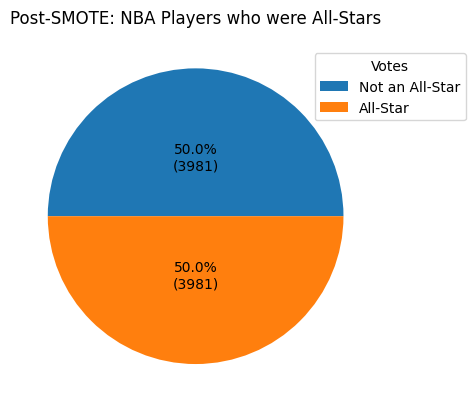

In [34]:
import matplotlib.pyplot as plt

# Pie chart visualization
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
                                 autopct=lambda pct: func(pct, classes.value_counts()),
                                 pctdistance=0.4)

ax.set_title("Post-SMOTE: NBA Players who were All-Stars")
ax.legend(["Not an All-Star", "All-Star"], title="Votes", loc='center right', bbox_to_anchor=(1.25, 0.85))

plt.show()


In [35]:
dataDf["is_smote"] = dataDf.index >= unSmoteLen


In [36]:
labeledDataDf = dataDf.merge(final_df, how = "left")
labeledDataDf

,season,ft_pct,obpm,fg3a_per_fga_pct,orb_pct,ows,ws_per_48,efg_pct,stl_per_g,fg3_per_g,...,ast_per_g,ast_pct,per,stl_pct,age,Is_All_Star,is_smote,player,team_id,pos
0,1982,0.706000,3.800000,0.002000,7.300000,6.900000,0.192000,0.579000,0.800000,0.000000,...,3.000000,11.900000,23.400000,1.100000,34,False,False,Kareem Abdul-Jabbar,LAL,C
1,1982,0.781000,1.400000,0.001000,6.600000,2.500000,0.144000,0.494000,1.400000,0.000000,...,4.500000,22.100000,18.600000,2.300000,27,False,False,Alvan Adams,PHO,C
2,1982,0.747000,1.400000,0.025000,1.300000,3.400000,0.115000,0.477000,0.800000,0.100000,...,8.000000,31.900000,14.300000,1.100000,33,True,False,Tiny Archibald,BOS,PG
3,1982,0.830000,1.500000,0.017000,5.100000,4.100000,0.154000,0.479000,1.700000,0.100000,...,3.200000,13.100000,17.900000,2.200000,27,False,False,Greg Ballard,WSB,SF
4,1982,0.804000,0.000000,0.014000,9.400000,2.200000,0.101000,0.507000,0.900000,0.000000,...,2.100000,8.800000,14.400000,1.200000,27,False,False,Kent Benson,DET,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,2015,0.879810,2.693364,0.258929,2.164147,5.173456,0.152288,0.508995,0.502212,1.397788,...,1.961935,10.691981,19.164608,0.900000,35,True,True,NaN,NaN,NaN
7991,2004,0.692180,3.490588,0.000000,10.673498,5.877771,0.166333,0.529410,0.756409,0.000000,...,2.569226,13.823900,23.094860,1.160681,25,True,True,NaN,NaN,NaN
7992,1995,0.838013,3.389089,0.142174,4.124890,5.239747,0.172149,0.462655,1.849781,0.574671,...,10.775987,42.090405,20.165076,2.412226,26,True,True,NaN,NaN,NaN
7993,1988,0.830944,7.029501,0.084696,3.529690,11.100189,0.248297,0.533822,2.288124,0.394062,...,13.552685,53.198864,25.176816,2.964561,27,True,True,NaN,NaN,NaN


In [37]:
final_df['Is_All_Star'] = final_df['Is_All_Star'].astype(str)
final_df['Is_All_Star'] = final_df['Is_All_Star'].str.strip().str.lower()
final_df['y'] = final_df['Is_All_Star'].map({'true': 1, 'false': 0})

In [38]:
final_df.columns

Index(['season', 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'player', 'orb_pct',
       'ows', 'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct',
       'fg3_pct', 'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g',
       'trb_pct', 'bpm', 'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct',
       'blk_pct', 'tov_per_g', 'dbpm', 'vorp', 'mp', 'fta_per_fga_pct',
       'tov_pct', 'trb_per_g', 'team_id', 'mp_per_g', 'fg_pct', 'ws',
       'blk_per_g', 'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'pos', 'fg2_pct',
       'fg_per_g', 'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age',
       'Is_All_Star', 'y'],
      dtype='object')

## Preliminary Analysis

All of our numerical explanatory variables had a strong association with the response variable as you can see that there is clearly separation between the IQR boxes in all of our box plots. While none of our explanatory variables had "weak relationships" with our response variable, blocks and total rebounds appeared to have the weakest associations/relationships with the response variable as there was less separation between IQR boxes than the rest of the explanatory variables. Our Categorical explanatory varaible also had a strong relationship with the response variable as we can see that at least two of the bars across positions were of differing heights suggesting there is an association.

In [39]:
positions = ['PG', 'SG', 'SF', 'PF', 'C']
pos_df = final_df[final_df['pos'].isin(positions)]
pos_df

,season,ft_pct,obpm,fg3a_per_fga_pct,player,orb_pct,ows,ws_per_48,efg_pct,stl_per_g,...,fg_per_g,g,dws,ast_per_g,ast_pct,per,stl_pct,age,Is_All_Star,y
0,1982,0.706,3.8,0.002,Kareem Abdul-Jabbar,7.3,6.9,0.192,0.579,0.8,...,9.9,76,3.9,3.0,11.9,23.4,1.1,34,false,0
1,1982,0.781,1.4,0.001,Alvan Adams,6.6,2.5,0.144,0.494,1.4,...,6.4,79,4.7,4.5,22.1,18.6,2.3,27,false,0
2,1982,0.747,1.4,0.025,Tiny Archibald,1.3,3.4,0.115,0.477,0.8,...,4.5,68,1.8,8.0,31.9,14.3,1.1,33,true,1
3,1982,0.830,1.5,0.017,Greg Ballard,5.1,4.1,0.154,0.479,1.7,...,7.9,79,5.3,3.2,13.1,17.9,2.2,27,false,0
4,1982,0.804,0.0,0.014,Kent Benson,9.4,2.2,0.101,0.507,0.9,...,5.4,75,3.0,2.1,8.8,14.4,1.2,27,false,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,2024,0.901,2.4,0.590,Derrick White,2.4,5.2,0.171,0.578,1.0,...,5.3,73,3.3,5.2,21.2,16.9,1.5,29,false,0
4975,2024,0.757,-1.9,0.555,Grant Williams,4.4,1.3,0.059,0.560,0.6,...,3.6,76,1.3,2.3,11.3,10.6,1.0,25,false,0
4976,2024,0.814,2.0,0.243,Jalen Williams,1.9,4.5,0.157,0.592,1.1,...,7.5,71,2.7,4.5,21.3,19.1,1.7,22,false,0
4977,2024,0.702,3.3,0.016,Zion Williamson,6.2,4.7,0.164,0.573,1.1,...,8.9,70,2.8,5.0,26.5,22.8,1.7,23,false,0


From the plots, it seems that there is interaction between every pair of numerical and categorical explanatory varibales that impacts the predicted response variable isAllStar

## Data Preprocessing 

Awesome, we've handled much of the preliminary data processing, but before we proceed with training our model, we need to divide it into training and testing sets.

An important point to note in the following code is the absence of data standardization. This step isn't necessary when working with tree-based models, as they don't require data standardization.

In [40]:
final_df.columns

Index(['season', 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'player', 'orb_pct',
       'ows', 'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct',
       'fg3_pct', 'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g',
       'trb_pct', 'bpm', 'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct',
       'blk_pct', 'tov_per_g', 'dbpm', 'vorp', 'mp', 'fta_per_fga_pct',
       'tov_pct', 'trb_per_g', 'team_id', 'mp_per_g', 'fg_pct', 'ws',
       'blk_per_g', 'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'pos', 'fg2_pct',
       'fg_per_g', 'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age',
       'Is_All_Star', 'y'],
      dtype='object')

In [41]:
columns = [ 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'player', 'orb_pct',
       'ows', 'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct',
       'fg3_pct', 'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g',
       'trb_pct', 'bpm', 'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct',
       'blk_pct', 'tov_per_g', 'dbpm', 'vorp', 'mp', 'fta_per_fga_pct',
       'tov_pct', 'trb_per_g', 'team_id', 'mp_per_g', 'fg_pct', 'ws',
       'blk_per_g', 'fta_per_g', 'fg3a_per_g', 'pts_per_g', 'pos', 'fg2_pct',
       'fg_per_g', 'g', 'dws', 'ast_per_g', 'ast_pct', 'per', 'stl_pct', 'age']

In [42]:
dfTestSet = final_df[final_df["season"] == 2022]

In [43]:
dfTestSet = dfTestSet[(dfTestSet["gs"] > 20) & (dfTestSet["pts_per_g"] > pts_cutoff) & (dfTestSet["mp_per_g"] > mp_perg_cutoff)].reset_index(drop = True)

In [44]:

modelDf = labeledDataDf.sample(frac=1).reset_index(drop=True)


trainInfo = modelDf[["season", "player", "pos", "team_id", "Is_All_Star", "is_smote"]]
trainData = modelDf[columns] 
trainTargets = modelDf[["Is_All_Star"]]

testInfo = dfTestSet[["season", "player", "pos", "team_id", "Is_All_Star"]]
testData = dfTestSet[columns]
testTargets = dfTestSet[["Is_All_Star"]]


In [45]:
modelDf.columns

Index(['season', 'ft_pct', 'obpm', 'fg3a_per_fga_pct', 'orb_pct', 'ows',
       'ws_per_48', 'efg_pct', 'stl_per_g', 'fg3_per_g', 'ts_pct', 'fg3_pct',
       'gs', 'orb_per_g', 'usg_pct', 'ft_per_g', 'drb_per_g', 'trb_pct', 'bpm',
       'fg2_per_g', 'fga_per_g', 'pf_per_g', 'drb_pct', 'blk_pct', 'tov_per_g',
       'dbpm', 'vorp', 'mp', 'fta_per_fga_pct', 'tov_pct', 'trb_per_g',
       'mp_per_g', 'fg_pct', 'ws', 'blk_per_g', 'fta_per_g', 'fg3a_per_g',
       'pts_per_g', 'fg2_pct', 'fg_per_g', 'g', 'dws', 'ast_per_g', 'ast_pct',
       'per', 'stl_pct', 'age', 'Is_All_Star', 'is_smote', 'player', 'team_id',
       'pos'],
      dtype='object')

# Random Forest 

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

validation_scores = {"season": [], "mae": [], "Is_All_Star": []}
seasons = trainInfo.season.unique()

for season in seasons:
    print("\n")
    print(f"Season: {season}")

    # Split data into training and validation folds
    trainFold = trainData[trainInfo["season"] != season]
    trainTarFold = trainTargets[trainInfo["season"] != season]
    valFold = trainData[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
    valTarFold = trainTargets[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
    valInfo = trainInfo[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]

    # Step 1: Identify and handle non-numeric columns in trainFold
    non_numeric_columns = trainFold.select_dtypes(include=['object']).columns
    print("Non-numeric columns:", non_numeric_columns)

    for col in non_numeric_columns:
        le = LabelEncoder()
        trainFold[col] = le.fit_transform(trainFold[col])

    # Step 2: Repeat for valFold
    non_numeric_columns_val = valFold.select_dtypes(include=['object']).columns
    print("Non-numeric columns in validation:", non_numeric_columns_val)

    for col in non_numeric_columns_val:
        le = LabelEncoder()
        valFold[col] = le.fit_transform(valFold[col])

    # Step 3: Ensure target is numeric
    if trainTarFold.select_dtypes(include=['object']).shape[1] > 0:
        trainTarFold = trainTarFold.apply(LabelEncoder().fit_transform)

    if valTarFold.select_dtypes(include=['object']).shape[1] > 0:
        valTarFold = valTarFold.apply(LabelEncoder().fit_transform)

    # Step 4: Fit the model
    regr = RandomForestRegressor(max_depth=7, random_state=0)
    regr.fit(trainFold.to_numpy(), trainTarFold.to_numpy()[:, 0])

    # Predict and calculate MAE
    valPred = regr.predict(valFold)
    mae = np.mean(np.absolute(valPred - valTarFold.to_numpy()[:, 0]))

    print(f"MAE: {mae}")

    # Find all players predicted as All-Stars
    predicted_all_stars = valInfo.iloc[np.where(valPred > 0.5)]  # Assuming a threshold of 0.5 for All-Star prediction
    
    print("Predicted All-Stars for the season:")
    print(predicted_all_stars)

    # Save validation results
    validation_scores["season"].append(season)
    validation_scores["mae"].append(mae)
    validation_scores["Is_All_Star"].append(list(predicted_all_stars["player"]))




Season: 2023
Non-numeric columns: Index(['player', 'team_id', 'pos'], dtype='object')
Non-numeric columns in validation: Index(['player', 'team_id', 'pos'], dtype='object')


/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

MAE: 0.16353682626788682
Predicted All-Stars for the season:
      season                 player  pos team_id  Is_All_Star  is_smote
0       2023                    NaN  NaN     NaN        False     False
261     2023                    NaN  NaN     NaN         True     False
406     2023                    NaN  NaN     NaN         True     False
589     2023                    NaN  NaN     NaN         True     False
827     2023                    NaN  NaN     NaN         True     False
1088    2023           Devin Booker   SG     PHO        False     False
1797    2023                    NaN  NaN     NaN         True     False
1968    2023                    NaN  NaN     NaN         True     False
2073    2023                    NaN  NaN     NaN        False     False
2368    2023                    NaN  NaN     NaN        False     False
2430    2023                    NaN  NaN     NaN        False     False
2650    2023                    NaN  NaN     NaN        False     False
268

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.22795311841387428
Predicted All-Stars for the season:
      season                  player  pos team_id  Is_All_Star  is_smote
679     1985         Sidney Moncrief   PG     MIL         True     False
1681    1985              Larry Bird   SF     BOS         True     False
1710    1985            Isiah Thomas   PG     DET         True     False
2154    1985            Bernard King   SF     NYK         True     False
2610    1985            Mark Aguirre   SF     DAL        False     False
2619    1985     Kareem Abdul-Jabbar    C     LAL        False     False
2841    1985            Alex English   SF     DEN         True     False
3423    1985          Michael Jordan   SG     CHI         True     False
3462    1985          Terry Cummings   PF     MIL         True     False
5353    1985             Calvin Natt   PF     DEN         True     False
5844    1985  Micheal Ray Richardson   PG     NJN         True     False
5959    1985                     NaN  NaN     NaN         True 

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14629050884890887
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
468     2016   DeMarcus Cousins   C     SAC         True     False
472     2016          Pau Gasol   C     CHI         True     False
801     2016      Isaiah Thomas  PG     BOS         True     False
940     2016         Kyle Lowry  PG     TOR         True     False
1070    2016       Kevin Durant  SF     OKC         True     False
1376    2016  Russell Westbrook  PG     OKC         True     False
1409    2016     Damian Lillard  PG     POR        False     False
1442    2016    Carmelo Anthony  SF     NYK         True     False
1904    2016       James Harden  SG     HOU         True     False
2711    2016      Anthony Davis   C     NOP         True     False
3788    2016          John Wall  PG     WAS         True     False
4264    2016       LeBron James  SF     CLE         True     False
4294    2016       Paul Millsap  PF     ATL         True     False
4

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14966091765016243
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
955     2015      Stephen Curry  PG     GSW         True     False
974     2015      Blake Griffin  PF     LAC         True     False
1588    2015   DeMarcus Cousins   C     SAC         True     False
2091    2015         Chris Paul  PG     LAC         True     False
2604    2015         Tim Duncan   C     SAS         True     False
2847    2015  Russell Westbrook  PG     OKC         True     False
3871    2015          Pau Gasol  PF     CHI         True     False
3969    2015       Kyrie Irving  PG     CLE         True     False
5445    2015      Klay Thompson  SG     GSW         True     False
5621    2015       James Harden  SG     HOU         True     False
5975    2015       Jimmy Butler  SG     CHI         True     False
6031    2015          John Wall  PG     WAS         True     False
6072    2015       LeBron James  SF     CLE         True     False
6

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14244535710683873
Predicted All-Stars for the season:
      season          player pos team_id  Is_All_Star  is_smote
971     2009     Kobe Bryant  SG     LAL         True     False
1041    2009   Dirk Nowitzki  PF     DAL         True     False
2076    2009    Kevin Durant  SF     OKC        False     False
3861    2009     Dwyane Wade  SG     MIA         True     False
4307    2009      Tim Duncan   C     SAS         True     False
4423    2009   Danny Granger  SF     IND         True     False
4586    2009       Pau Gasol   C     LAL         True     False
5486    2009      Chris Bosh   C     TOR         True     False
6035    2009      Chris Paul  PG     NOH         True     False
6944    2009    LeBron James  SF     CLE         True     False
7004    2009     Tony Parker  PG     SAS         True     False
7244    2009     Brandon Roy  SG     POR         True     False
7431    2009   Dwight Howard   C     ORL         True     False
7519    2009        Yao Ming   C     HOU   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15275344524926535
Predicted All-Stars for the season:
      season                 player pos team_id  Is_All_Star  is_smote
456     2018          Anthony Davis  PF     NOP         True     False
499     2018           Kyrie Irving  PG     BOS         True     False
1361    2018         Damian Lillard  PG     POR         True     False
1599    2018           Jimmy Butler  SG     MIN         True     False
1615    2018          Stephen Curry  PG     GSW         True     False
2216    2018      Russell Westbrook  PG     OKC         True     False
2743    2018     Karl-Anthony Towns   C     MIN        False     False
4291    2018       DeMarcus Cousins   C     NOP         True     False
4333    2018             Chris Paul  PG     HOU        False     False
4551    2018           LeBron James  PF     CLE         True     False
5095    2018            Joel Embiid   C     PHI         True     False
5216    2018      LaMarcus Aldridge   C     SAS         True     False
5262    2018    

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15716092325533418
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
94      1991       Tim Hardaway  PG     GSW         True     False
1767    1991     Michael Jordan  SG     CHI         True     False
2015    1991      Reggie Miller  SG     IND        False     False
2608    1991       Terry Porter  PG     POR         True     False
3229    1991  Dominique Wilkins  SF     ATL         True     False
3311    1991     Scottie Pippen  SF     CHI        False     False
3502    1991      Patrick Ewing   C     NYK         True     False
4033    1991      Clyde Drexler  SG     POR         True     False
4099    1991     Hersey Hawkins  SG     PHI         True     False
4209    1991      Magic Johnson  PG     LAL         True     False
4643    1991      John Stockton  PG     UTA         True     False
4786    1991    Hakeem Olajuwon   C     HOU        False     False
5339    1991         Joe Dumars  SG     DET         True     False
5

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14787254040119718
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
8       1990       Chris Mullin  SF     GSW         True     False
39      1990     Michael Jordan  SG     CHI         True     False
876     1990      Kevin Johnson  PG     PHO         True     False
1407    1990       Kevin McHale  PF     BOS         True     False
1450    1990     David Robinson   C     SAS         True     False
1563    1990       Isiah Thomas  PG     DET         True     False
1672    1990     Terry Cummings  PF     SAS        False     False
2348    1990        Karl Malone  PF     UTA         True     False
2465    1990    Hakeem Olajuwon   C     HOU         True     False
2717    1990    Charles Barkley  SF     PHI         True     False
3838    1990      Magic Johnson  PG     LAL         True     False
3982    1990  Dominique Wilkins  SF     ATL         True     False
4829    1990       Terry Porter  PG     POR        False     False
5

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.23208876345468346
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
400     1987       Walter Davis  SG     PHO         True     False
479     1987       Sleepy Floyd  PG     GSW         True     False
957     1987    Hakeem Olajuwon   C     HOU         True     False
1000    1987    Charles Barkley  PF     PHI         True     False
1004    1987        Larry Nance  PF     PHO        False     False
1017    1987      Clyde Drexler  SG     POR        False     False
1229    1987       Kevin McHale  PF     BOS         True     False
1724    1987         Larry Bird  SF     BOS         True     False
1908    1987       Moses Malone   C     WSB         True     False
2051    1987     Michael Jordan  SG     CHI         True     False
2203    1987    Kiki Vandeweghe  SF     POR        False     False
3001    1987          Fat Lever  PG     DEN        False     False
3255    1987       Alex English  SF     DEN         True     False
3

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.12410827468306154
Predicted All-Stars for the season:
      season               player pos team_id  Is_All_Star  is_smote
837     1999           Grant Hill  SF     DET        False     False
1150    1999  Shareef Abdur-Rahim  SF     VAN        False     False
2252    1999          Karl Malone  PF     UTA        False     False
5358    1999           Tim Duncan  PF     SAS        False     False
5771    1999      Alonzo Mourning   C     MIA        False     False
6461    1999          Gary Payton  PG     SEA        False     False
7344    1999           Jason Kidd  PG     PHO        False     False
7852    1999        Allen Iverson  SG     PHI        False     False


Season: 2014
Non-numeric columns: Index(['player', 'team_id', 'pos'], dtype='object')
Non-numeric columns in validation: Index(['player', 'team_id', 'pos'], dtype='object')


/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14843019771902846
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
154     2014      Stephen Curry  PG     GSW         True     False
310     2014         Kyle Lowry  PG     TOR        False     False
1244    2014  LaMarcus Aldridge  PF     POR         True     False
1830    2014       James Harden  SG     HOU         True     False
2176    2014        Joakim Noah   C     CHI         True     False
2782    2014       Goran Dragić  SG     PHO        False     False
3543    2014      Dwight Howard   C     HOU         True     False
5109    2014       Kevin Durant  SF     OKC         True     False
5474    2014       Al Jefferson   C     CHA        False     False
5611    2014         Kevin Love  PF     MIN         True     False
6152    2014  Russell Westbrook  PG     OKC        False     False
6441    2014       LeBron James  PF     MIA         True     False
6711    2014    Carmelo Anthony  PF     NYK         True     False
7

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.22189110307489987
Predicted All-Stars for the season:
      season               player pos team_id  Is_All_Star  is_smote
328     1983           Larry Bird  PF     BOS         True     False
820     1983         Mark Aguirre  SF     DAL        False     False
904     1983           Jim Paxson  SG     POR         True     False
973     1983         Bernard King  SF     NYK        False     False
1469    1983           Jack Sikma   C     SEA         True     False
1820    1983      Kiki Vandeweghe  PF     DEN         True     False
2181    1983       Kelly Tripucka  SF     DET        False     False
2341    1983        George Gervin  SG     SAS         True     False
4610    1983        Robert Parish   C     BOS         True     False
4926    1983         Alex English  SF     DEN         True     False
5405    1983         Gus Williams  PG     SEA         True     False
5497    1983         Isiah Thomas  PG     DET         True     False
5532    1983         Moses Malone   C     

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.1627372025393604
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
1271    1994         Mark Price  PG     CLE         True     False
1345    1994  Dominique Wilkins  SF     TOT         True     False
2343    1994    Derrick Coleman  PF     NJN         True     False
2913    1994      Reggie Miller  SG     IND        False     False
3184    1994    Charles Barkley  PF     PHO         True     False
3778    1994         Shawn Kemp  PF     SEA         True     False
4157    1994    Mookie Blaylock  PG     ATL         True     False
4167    1994    Hakeem Olajuwon   C     HOU         True     False
4539    1994     David Robinson   C     SAS         True     False
5352    1994      John Stockton  PG     UTA         True     False
5446    1994      Patrick Ewing   C     NYK         True     False
6109    1994     Scottie Pippen  SF     CHI         True     False
6882    1994        Karl Malone  PF     UTA         True     False




/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.19222577963225843
Predicted All-Stars for the season:
      season                  player  pos team_id  Is_All_Star  is_smote
1773    1982              Jack Sikma    C     SEA         True     False
1813    1982           Julius Erving   SF     PHI         True     False
2553    1982            Ray Williams   SG     NJN        False     False
2558    1982         Sidney Moncrief   SG     MIL         True     False
2633    1982  Micheal Ray Richardson   PG     NYK         True     False
3602    1982           Magic Johnson   SG     LAL         True     False
3711    1982          Adrian Dantley   SF     UTA         True     False
4352    1982              Larry Bird   PF     BOS         True     False
5288    1982           George Gervin   SG     SAS         True     False
5457    1982            Bernard King   SF     GSW         True     False
5891    1982            Moses Malone    C     HOU         True     False
6184    1982            Gus Williams   PG     SEA         True 

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.16011729737763528
Predicted All-Stars for the season:
      season                 player pos team_id  Is_All_Star  is_smote
459     2020           Bradley Beal  SG     WAS        False     False
614     2020         Damian Lillard  PG     POR         True     False
1503    2020           Nikola Jokić   C     DEN        False     False
1566    2020             Chris Paul  PG     OKC         True     False
2266    2020            Zach LaVine  SF     CHI        False     False
2292    2020     Karl-Anthony Towns   C     MIN        False     False
3197    2020           Devin Booker  SG     PHO         True     False
3723    2020      Russell Westbrook  PG     HOU         True     False
3888    2020            Luka Dončić  PG     DAL        False     False
4236    2020          Anthony Davis  PF     LAL         True     False
4682    2020  Giannis Antetokounmpo  PF     MIL         True     False
5268    2020           Jayson Tatum  PF     BOS         True     False
5444    2020    

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15630196334035484
Predicted All-Stars for the season:
      season           player  pos team_id  Is_All_Star  is_smote
17      2010    Danny Granger   SF     IND        False     False
1072    2010       Chris Bosh    C     TOR         True     False
2452    2010     Kevin Durant   SF     OKC         True     False
3573    2010       Steve Nash   PG     PHO         True     False
3790    2010      Dwyane Wade   SG     MIA         True     False
3913    2010    Dirk Nowitzki   PF     DAL         True     False
4133    2010              NaN  NaN     NaN        False     False
4949    2010      Kobe Bryant   SG     LAL         True     False
4973    2010       Tim Duncan    C     SAS         True     False
5053    2010     LeBron James   SF     CLE         True     False
6241    2010    Dwight Howard    C     ORL         True     False
6691    2010        David Lee    C     NYK         True     False
7121    2010  Carmelo Anthony   SF     DEN         True     False
7506    2010   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.16138261037117896
Predicted All-Stars for the season:
      season             player  pos team_id  Is_All_Star  is_smote
1433    1989       Alex English   SF     DEN         True     False
2016    1989                NaN  NaN     NaN        False     False
2649    1989        Karl Malone   PF     UTA         True     False
2935    1989      John Stockton   PG     UTA         True     False
3118    1989         Mark Price   PG     CLE         True     False
3460    1989       Tom Chambers   PF     PHO         True     False
4060    1989      Kevin Johnson   PG     PHO        False     False
4970    1989       Chris Mullin   SF     GSW         True     False
5038    1989       Moses Malone    C     ATL         True     False
5645    1989      Magic Johnson   PG     LAL         True     False
6057    1989         Dale Ellis   SG     SEA         True     False
6274    1989      Patrick Ewing    C     NYK         True     False
6560    1989    Hakeem Olajuwon    C     HOU         Tr

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14629815694016385
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
155     2011       Kevin Martin  SG     HOU        False     False
232     2011        Dwyane Wade  SG     MIA         True     False
534     2011        Kobe Bryant  SG     LAL         True     False
845     2011         Chris Paul  PG     NOH         True     False
1122    2011        Paul Pierce  SF     BOS         True     False
1166    2011      Zach Randolph  PF     MEM        False     False
1558    2011         Kevin Love  PF     MIN         True     False
1620    2011       Derrick Rose  PG     CHI         True     False
1635    2011      Manu Ginóbili  SG     SAS        False     False
1781    2011      Dirk Nowitzki  PF     DAL         True     False
3917    2011      Dwight Howard   C     ORL         True     False
4409    2011         Al Horford   C     ATL         True     False
4842    2011       LeBron James  SF     MIA         True     False
5

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.277755590926724
Predicted All-Stars for the season:
      season            player pos team_id  Is_All_Star  is_smote
399     1984      Mark Aguirre  SF     DAL         True     False
531     1984        Larry Bird  PF     BOS        False     False
983     1984    Adrian Dantley  SF     UTA         True     False
1190    1984    Adrian Dantley  SF     UTA         True     False
1219    1984   Sidney Moncrief  SG     MIL        False     False
1250    1984     Magic Johnson  PG     LAL         True     False
1436    1984      Alex English  SF     DEN         True     False
1500    1984      Isiah Thomas  PG     DET        False     False
2428    1984     Magic Johnson  PG     LAL         True     False
2798    1984      Bernard King  SF     NYK        False     False
2906    1984     Julius Erving  SF     PHI        False     False
3024    1984   Marques Johnson  SF     MIL        False     False
3211    1984    Adrian Dantley  SF     UTA         True     False
3447    1984   Ki

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.1717012985495843
Predicted All-Stars for the season:
      season           player pos team_id  Is_All_Star  is_smote
41      1998       Grant Hill  SF     DET         True     False
421     1998      Sam Cassell  PG     NJN        False     False
2070    1998   David Robinson   C     SAS         True     False
2112    1998     Chris Webber   C     WAS        False     False
2131    1998    Reggie Miller  SG     IND         True     False
2457    1998       Tim Duncan  PF     SAS         True     False
2858    1998   Michael Finley  SF     DAL        False     False
3918    1998  Arvydas Sabonis   C     POR        False     False
3935    1998    Kevin Garnett  PF     MIN         True     False
4176    1998     Tim Hardaway  PG     MIA         True     False
5679    1998    Allen Iverson  PG     PHI        False     False
5849    1998      Karl Malone  PF     UTA         True     False
6264    1998   Rod Strickland  PG     WAS        False     False
6486    1998   Mitch Richmond 

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.18019906331904578
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
27      1992      Patrick Ewing   C     NYK         True     False
211     1992        Karl Malone  PF     UTA         True     False
333     1992      Clyde Drexler  SG     POR         True     False
1359    1992    Hakeem Olajuwon   C     HOU         True     False
1441    1992      Kevin Johnson  PG     PHO        False     False
1625    1992       Horace Grant  PF     CHI        False     False
1903    1992      Jeff Hornacek  SG     PHO         True     False
2106    1992         Mark Price  PG     CLE         True     False
2323    1992       Tim Hardaway  PG     GSW         True     False
2979    1992        Larry Nance  PF     CLE        False     False
3020    1992     Scottie Pippen  SF     CHI         True     False
3625    1992       Chris Mullin  SF     GSW         True     False
3851    1992     Michael Jordan  SG     CHI         True     False
3

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.16251080928743583
Predicted All-Stars for the season:
      season             player    pos team_id  Is_All_Star  is_smote
59      2007  Amar'e Stoudemire      C     PHO        False     False
274     2007          Ray Allen     SG     SEA         True     False
418     2007                NaN    NaN     NaN         True     False
736     2007       Vince Carter     SG     NJN         True     False
828     2007        Tony Parker     PG     SAS         True     False
1069    2007      Tracy McGrady     SG     HOU         True     False
1154    2007        Kobe Bryant     SG     LAL         True     False
1483    2007      Dirk Nowitzki     PF     DAL         True     False
1930    2007    Carmelo Anthony     SF     DEN         True     False
1958    2007         Jason Kidd     PG     NJN         True     False
2180    2007      Zach Randolph     PF     POR        False     False
2691    2007        Elton Brand     PF     LAC        False     False
2888    2007      Allen Ivers

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14663038612902066
Predicted All-Stars for the season:
      season           player pos team_id  Is_All_Star  is_smote
30      2000        Ray Allen  SG     MIL         True     False
846     2000  Stephon Marbury  PG     NJN        False     False
1454    2000  Alonzo Mourning   C     MIA         True     False
2007    2000      Gary Payton  PG     SEA         True     False
2124    2000      Kobe Bryant  SG     LAL         True     False
2551    2000    Kevin Garnett  PF     MIN         True     False
2626    2000       Jason Kidd  PG     PHO         True     False
3873    2000       Grant Hill  SF     DET         True     False
4194    2000     Vince Carter  SF     TOR         True     False
4470    2000     Chris Webber  PF     SAC         True     False
4944    2000   Michael Finley  SF     DAL         True     False
4990    2000   David Robinson   C     SAS         True     False
5383    2000      Karl Malone  PF     UTA         True     False
5415    2000       Tim Duncan

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.21939027984749754
Predicted All-Stars for the season:
      season               player  pos team_id  Is_All_Star  is_smote
891     1986        Magic Johnson   PG     LAL         True     False
1540    1986         Isiah Thomas   PG     DET         True     False
1951    1986    Dominique Wilkins   SF     ATL         True     False
2028    1986       Adrian Dantley   SF     UTA         True     False
2590    1986         Alex English   SF     DEN         True     False
2607    1986           Larry Bird   SF     BOS         True     False
2623    1986                  NaN  NaN     NaN         True     False
3933    1986  Kareem Abdul-Jabbar    C     LAL        False     False
4666    1986      Sidney Moncrief   PG     MIL         True     False
5067    1986                  NaN  NaN     NaN         True     False
5491    1986      Charles Barkley   PF     PHI        False     False
5841    1986       Maurice Cheeks   PG     PHI         True     False


Season: 2008
Non-numeric co

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.183696864263277
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
422     2008      Dwight Howard   C     ORL         True     False
799     2008        Baron Davis  PG     GSW        False     False
1129    2008         David West  PF     NOH         True     False
1735    2008         Steve Nash  PG     PHO         True     False
2364    2008         Chris Paul  PG     NOH         True     False
3330    2008         Tim Duncan   C     SAS         True     False
3341    2008         Chris Bosh   C     TOR         True     False
3537    2008           Yao Ming   C     HOU         True     False
3983    2008   Jason Richardson  SF     CHA        False     False
4139    2008        Paul Pierce  SF     BOS         True     False
4208    2008      Manu Ginóbili  SG     SAS        False     False
4640    2008       LeBron James  SF     CLE         True     False
4721    2008   Chauncey Billups  PG     DET         True     False
491

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.1563872898877169
Predicted All-Stars for the season:
      season                 player pos team_id  Is_All_Star  is_smote
721     2022           Nikola Jokić   C     DEN        False     False
883     2022            Luka Dončić  PG     DAL        False     False
1076    2022        Dejounte Murray  PG     SAS         True     False
1463    2022          Stephen Curry  PG     GSW         True     False
1715    2022           Jaylen Brown  SF     BOS        False     False
1924    2022           Jayson Tatum  SF     BOS         True     False
1950    2022           LeBron James  PF     LAL         True     False
2486    2022            Joel Embiid   C     PHI         True     False
3349    2022     Karl-Anthony Towns   C     MIN        False     False
3669    2022           Devin Booker  SG     PHO         True     False
3859    2022           Jimmy Butler  SF     MIA         True     False
4166    2022          DeMar DeRozan  PF     CHI         True     False
5220    2022  Gia

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.17010567607847965
Predicted All-Stars for the season:
      season                   player pos team_id  Is_All_Star  is_smote
171     2024             Kyrie Irving  SG     DAL        False     False
359     2024            Anthony Davis   C     LAL         True     False
989     2024          Zion Williamson  PF     NOP        False     False
1373    2024        Tyrese Haliburton  PG     IND         True     False
1396    2024    Giannis Antetokounmpo  PF     MIL         True     False
1399    2024            Kawhi Leonard  SF     LAC         True     False
1869    2024          Anthony Edwards  SG     MIN         True     False
1960    2024             LeBron James  PF     LAL         True     False
2709    2024           Alperen Sengun   C     HOU        False     False
2930    2024             Jimmy Butler  PF     MIA        False     False
3308    2024            Jalen Brunson  PG     NYK         True     False
3581    2024        Victor Wembanyama   C     SAS        False 

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15910010369464467
Predicted All-Stars for the season:
      season            player pos team_id  Is_All_Star  is_smote
254     2004     Tracy McGrady  SG     ORL         True     False
651     2004       Ben Wallace   C     DET         True     False
668     2004     Dirk Nowitzki   C     DAL         True     False
720     2004     Allen Iverson  SG     PHI         True     False
1617    2004          Yao Ming   C     HOU         True     False
1679    2004         Ray Allen  SG     SEA         True     False
1972    2004        Jason Kidd  PG     NJN         True     False
2021    2004      Shawn Marion  SF     PHO        False     False
4082    2004       Sam Cassell  PG     MIN         True     False
4597    2004   Stephon Marbury  PG     TOT        False     False
4758    2004      Vince Carter  SG     TOR         True     False
5052    2004  Andrei Kirilenko  PF     UTA         True     False
5108    2004   Jermaine O'Neal  PF     IND        False     False
5451    2004   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15467416363443498
Predicted All-Stars for the season:
      season             player  pos team_id  Is_All_Star  is_smote
1206    1997         Grant Hill   SF     DET         True     False
1275    1997      Anthony Mason   PF     CHH        False     False
1366    1997        Gary Payton   PG     SEA         True     False
1501    1997    Terrell Brandon   PG     CLE         True     False
1742    1997        Karl Malone   PF     UTA         True     False
1796    1997    Charles Barkley   PF     HOU         True     False
1806    1997      Kevin Johnson   PG     PHO        False     False
2694    1997     Mitch Richmond   SG     SAC         True     False
3045    1997      John Stockton   PG     UTA         True     False
3428    1997                NaN  NaN     NaN         True     False
4180    1997       Chris Webber   PF     WSB         True     False
4216    1997      Reggie Miller   SG     IND        False     False
4524    1997          Glen Rice   SF     CHH         Tr

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.18029608670049455
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
139     2013       Kevin Durant  SF     OKC         True     False
296     2013      Stephen Curry  PG     GSW        False     False
1092    2013       James Harden  SG     HOU         True     False
1208    2013         Tim Duncan   C     SAS         True     False
1764    2013         David West  PF     IND        False     False
2404    2013    Carmelo Anthony  PF     NYK         True     False
5013    2013         Marc Gasol   C     MEM        False     False
5050    2013       LeBron James  PF     MIA         True     False
5876    2013  Russell Westbrook  PG     OKC         True     False
6452    2013         Chris Paul  PG     LAC         True     False
6897    2013        Kobe Bryant  SG     LAL         True     False
7643    2013      Blake Griffin  PF     LAC         True     False
7811    2013     Deron Williams  PG     BRK        False     False
7

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.18199461427080335
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
530     1993      Larry Johnson  PF     CHH         True     False
737     1993    Charles Barkley  PF     PHO         True     False
899     1993    Hakeem Olajuwon   C     HOU         True     False
1201    1993     Brad Daugherty   C     CLE         True     False
2302    1993    Derrick Coleman  PF     NJN        False     False
2569    1993      John Stockton  PG     UTA         True     False
2663    1993      Patrick Ewing   C     NYK         True     False
2703    1993     Michael Jordan  SG     CHI         True     False
2854    1993         Joe Dumars  SG     DET         True     False
2884    1993         Mark Price  PG     CLE         True     False
2908    1993  Dominique Wilkins  SF     ATL         True     False
3166    1993     David Robinson   C     SAS         True     False
3626    1993     Scottie Pippen  SF     CHI         True     False
3

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.13884504017042634
Predicted All-Stars for the season:
      season            player pos team_id  Is_All_Star  is_smote
428     2006      Vince Carter  SG     NJN         True     False
1054    2006         Pau Gasol  PF     MEM         True     False
2282    2006       Kobe Bryant  SG     LAL         True     False
2318    2006        Tim Duncan  PF     SAS         True     False
2704    2006     Dirk Nowitzki  PF     DAL         True     False
3156    2006  Jason Richardson  SG     GSW        False     False
3250    2006       Paul Pierce  SF     BOS         True     False
3306    2006        Chris Bosh   C     TOR         True     False
3382    2006  Chauncey Billups  PG     DET         True     False
3407    2006        Steve Nash  PG     PHO         True     False
3420    2006      LeBron James  SF     CLE         True     False
3640    2006     Tracy McGrady  SF     HOU         True     False
3660    2006         Ray Allen  SG     SEA         True     False
4328    2006   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.17217862251161606
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
49      1995      Patrick Ewing   C     NYK         True     False
130     1995     David Robinson   C     SAS         True     False
382     1995    Charles Barkley  PF     PHO         True     False
808     1995    Hakeem Olajuwon   C     HOU         True     False
1550    1995    Alonzo Mourning   C     CHH         True     False
2089    1995    Detlef Schrempf  SF     SEA         True     False
2882    1995        Dana Barros  PG     PHI         True     False
3526    1995          Glen Rice  SF     MIA        False     False
4098    1995  Anfernee Hardaway  PG     ORL         True     False
5129    1995      Clyde Drexler  SG     TOT        False     False
5553    1995     Rod Strickland  PG     POR        False     False
6284    1995        Karl Malone  PF     UTA         True     False
6786    1995        Gary Payton  PG     SEA         True     False
6

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15423462298773855
Predicted All-Stars for the season:
      season           player  pos team_id  Is_All_Star  is_smote
157     2002     Shawn Marion   SF     PHO        False     False
1512    2002     Vince Carter   SG     TOR         True     False
1917    2002    Dirk Nowitzki    C     DAL         True     False
1937    2002      Kobe Bryant   SG     LAL         True     False
1974    2002      Ben Wallace    C     DET        False     False
2740    2002       Tim Duncan   PF     SAS         True     False
2763    2002  Peja Stojaković   SF     SAC        False     False
3136    2002     Chris Webber   PF     SAC         True     False
3381    2002              NaN  NaN     NaN         True     False
3619    2002    Kevin Garnett   PF     MIN         True     False
4043    2002    Allen Iverson   SG     PHI         True     False
4067    2002  Rasheed Wallace   PF     POR        False     False
4083    2002       Jason Kidd   PG     NJN         True     False
4844    2002   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.1750247862185889
Predicted All-Stars for the season:
      season                 player    pos team_id  Is_All_Star  is_smote
213     2021            Bam Adebayo      C     MIA        False     False
342     2021        Zion Williamson     PF     NOP         True     False
636     2021          Kawhi Leonard     SF     LAC         True     False
682     2021             Trae Young     PG     ATL        False     False
970     2021            Joel Embiid      C     PHI         True     False
1232    2021            Luka Dončić     PG     DAL        False     False
1247    2021           James Harden  PG-SG     TOT         True     False
2502    2021  Giannis Antetokounmpo     PF     MIL         True     False
2512    2021            Zach LaVine     SG     CHI         True     False
2796    2021            Rudy Gobert      C     UTA         True     False
3355    2021           Kevin Durant     PF     BRK         True     False
3438    2021           Bradley Beal     SG     WAS  

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.1525743200341152
Predicted All-Stars for the season:
      season           player  pos team_id  Is_All_Star  is_smote
857     2003      Kobe Bryant   SG     LAL         True     False
902     2003    Dirk Nowitzki   PF     DAL         True     False
2161    2003     Chris Webber   PF     SAC         True     False
2501    2003  Stephon Marbury   PG     PHO         True     False
2583    2003   Jamal Mashburn   SF     NOH         True     False
3213    2003    Tracy McGrady   SG     ORL         True     False
3900    2003      Ben Wallace    C     DET         True     False
4494    2003       Tim Duncan   PF     SAS         True     False
4553    2003    Kevin Garnett   PF     MIN         True     False
4608    2003    Steve Francis   PG     HOU         True     False
4706    2003      Gary Payton   PG     TOT         True     False
5164    2003    Allen Iverson   SG     PHI         True     False
5529    2003      Karl Malone   PF     UTA        False     False
5680    2003    

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.14892904597492254
Predicted All-Stars for the season:
      season             player    pos team_id  Is_All_Star  is_smote
480     2005         Steve Nash     PG     PHO         True     False
781     2005       Larry Hughes     SG     WAS        False     False
1095    2005        Dwyane Wade     SG     MIA         True     False
1979    2005        Kobe Bryant     SG     LAL         True     False
2061    2005          Ray Allen     SG     SEA         True     False
4415    2005      Allen Iverson     PG     PHI         True     False
4857    2005       LeBron James     SF     CLE         True     False
4874    2005     Gilbert Arenas     PG     WAS         True     False
4956    2005  Amar'e Stoudemire      C     PHO        False     False
5766    2005       Shawn Marion     PF     PHO         True     False
5813    2005      Tracy McGrady     SF     HOU         True     False
5838    2005                NaN    NaN     NaN         True     False
6238    2005       Vince Cart

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.19005327820197634
Predicted All-Stars for the season:
      season            player pos team_id  Is_All_Star  is_smote
70      2001        Jason Kidd  PG     PHO         True     False
174     2001       Paul Pierce  SF     BOS        False     False
527     2001         Ray Allen  SG     MIL         True     False
640     2001    Michael Finley  SF     DAL         True     False
922     2001  Jerry Stackhouse  SG     DET         True     False
1100    2001     Steve Francis  PG     HOU        False     False
1198    2001     Kevin Garnett  PF     MIN         True     False
1595    2001    David Robinson   C     SAS         True     False
2084    2001     Dirk Nowitzki  PF     DAL        False     False
2396    2001       Gary Payton  PG     SEA         True     False
2531    2001      Vince Carter  SF     TOR         True     False
2835    2001        Tim Duncan  PF     SAS         True     False
3452    2001   Rasheed Wallace  PF     POR         True     False
4090    2001   

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.16952525406326277
Predicted All-Stars for the season:
      season                 player  pos team_id  Is_All_Star  is_smote
281     2019           Kevin Durant   SF     GSW         True     False
662     2019          Anthony Davis    C     NOP         True     False
887     2019            Luka Dončić   SG     DAL        False     False
1127    2019                    NaN  NaN     NaN        False     False
1504    2019         Andre Drummond    C     DET        False     False
1507    2019          Stephen Curry   PG     GSW         True     False
1678    2019           Devin Booker   SG     PHO        False     False
1712    2019     Karl-Anthony Towns    C     MIN        False     False
1888    2019           Bradley Beal   SG     WAS         True     False
2045    2019      LaMarcus Aldridge    C     SAS         True     False
2498    2019          Kawhi Leonard   SF     TOR         True     False
2521    2019            Mike Conley   PG     MEM        False     False
255

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.15916196610134858
Predicted All-Stars for the season:
      season                 player pos team_id  Is_All_Star  is_smote
341     2017           James Harden  PG     HOU         True     False
413     2017           LeBron James  SF     CLE         True     False
1151    2017          DeMar DeRozan  SG     TOR         True     False
1696    2017      Russell Westbrook  PG     OKC         True     False
1987    2017              John Wall  PG     WAS         True     False
2001    2017            Rudy Gobert   C     UTA        False     False
2939    2017     Karl-Anthony Towns   C     MIN        False     False
2963    2017             Chris Paul  PG     LAC        False     False
2988    2017          Stephen Curry  PG     GSW         True     False
3270    2017         Gordon Hayward  SF     UTA         True     False
3457    2017  Giannis Antetokounmpo  SF     MIL         True     False
4253    2017           Jimmy Butler  SF     CHI         True     False
4807    2017    

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.18408475719471357
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
1621    2012  Russell Westbrook  PG     OKC         True     False
3089    2012      Dwight Howard   C     ORL         True     False
3437    2012        Paul Pierce  SF     BOS         True     False
3795    2012         Kevin Love  PF     MIN         True     False
5385    2012        Kobe Bryant  SG     LAL         True     False
5391    2012         Chris Paul  PG     LAC         True     False
5705    2012       Kevin Durant  SF     OKC         True     False
6256    2012       LeBron James  SF     MIA         True     False
7439    2012        Dwyane Wade  SG     MIA         True     False


Season: 1988
Non-numeric columns: Index(['player', 'team_id', 'pos'], dtype='object')
Non-numeric columns in validation: Index(['player', 'team_id', 'pos'], dtype='object')


/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[col] = le.fit_transform(trainFold[col])
/var/folders/51/d53d0_591f5fdkvr9fr8gsz00000gn/T/ipykernel_60297/118853544.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainFold[c

MAE: 0.20229637865601877
Predicted All-Stars for the season:
      season             player pos team_id  Is_All_Star  is_smote
269     1988       Moses Malone   C     WSB         True     False
580     1988      Magic Johnson  PG     LAL         True     False
694     1988      John Stockton  PG     UTA        False     False
762     1988    Charles Barkley  PF     PHI         True     False
833     1988       Isiah Thomas  PG     DET         True     False
1573    1988         Dale Ellis  SG     SEA        False     False
1651    1988     Michael Jordan  SG     CHI         True     False
3060    1988      Clyde Drexler  SG     POR         True     False
3076    1988        Byron Scott  SG     LAL        False     False
3092    1988      Patrick Ewing   C     NYK         True     False
3857    1988  Dominique Wilkins  SF     ATL         True     False
4235    1988    Hakeem Olajuwon   C     HOU         True     False
4383    1988         Larry Bird  SF     BOS         True     False
4

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Accuracy

In [47]:
import numpy as np

correct_all_star_predictions = 0
total_seasons = len(validation_scores["season"])

for i in range(total_seasons):
    predicted_all_stars = set(validation_scores["Is_All_Star"][i])
    actual_all_stars = set(valInfo[valInfo["season"] == validation_scores["season"][i]]["player"])
    
  
    correct_all_star_predictions += len(predicted_all_stars & actual_all_stars)


all_star_accuracy = correct_all_star_predictions / total_seasons if total_seasons > 0 else 0

print(f"All-Star Prediction Accuracy: {all_star_accuracy:.2f}")


All-Star Prediction Accuracy: 0.40


# Conclusion / Takeaways 

The model achieved an accuracy of 40% in predicting All-Star players across seasons. While this demonstrates the model's ability to identify more less than half of the actual All-Stars, it highlights room for improvement. This level of accuracy suggests that the model is capturing some key features and patterns related to All-Star selection, such as player statistics or performance metrics, but it may not fully account for other factors like fan voting, media influence, or intangibles like player popularity and leadership qualities. Enhancing the dataset with additional features—such as advanced statistics, awards, all-star votes, or team success metrics—could improve the model's performance. Additionally, experimenting with different algorithms, hyperparameter tuning, and feature engineering could further boost accuracy. Overall, while the 40% accuracy over a 40 year period provides a foundation, there is significant potential to refine the model and improve its predictive power. 

While it is not as accurate as our final project for STAT 207, it went to a lot greater detail with SMOTE and balancing the data to create a random forest predicting all-stars. As I continue to go on my Machine Learning journey, I will revist this project and see which ways I can improve this notebook to increase the All-Star Prediction Accuracy from 1982 to the present NBA Season. 